In [2]:
from time import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from sklearn.model_selection import GridSearchCV


# Dense vs sparse comparison

In [2]:
X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
# create a copy of X in sparse format
X_sp = sparse.coo_matrix(X)

alpha = 1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)

t0 = time()
sparse_lasso.fit(X_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(X, y)
print(f"Dense Lasso done in {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

Sparse Lasso done in 0.090s
Dense Lasso done in 0.038s
Distance between coefficients : 1.13e-13


In [3]:
# make a copy of the previous data
Xs = X.copy()
# make Xs sparse by replacing the values lower than 2.5 with 0s
Xs[Xs < 2.5] = 0.0
# create a copy of Xs in sparse format
Xs_sp = sparse.coo_matrix(Xs)
Xs_sp = Xs_sp.tocsc()

# compute the proportion of non-zero coefficient in the data matrix
print(f"Matrix density : {(Xs_sp.nnz / float(X.size) * 100):.3f}%")

alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)

t0 = time()
sparse_lasso.fit(Xs_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(Xs, y)
print(f"Dense Lasso done in  {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

Matrix density : 0.626%
Sparse Lasso done in 0.124s
Dense Lasso done in  0.725s
Distance between coefficients : 8.78e-12


# Diabetes dataset

In [ ]:
#Original dataset

In [74]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)

D = X.shape[1]

X_train = X[:150]
y_train = y[:150]
X_val = X[150:200]
y_val = y[150:200]

alpha = 0.1

#lasso = Lasso(alpha=alpha,random_state=0, max_iter=10000)

t0 = time()
#lasso.fit(X, y)
#print(f"Lasso done in {(time() - t0):.3f}s")

(442, 10)


In [75]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-5, 0, 50)

scores_train = []
scores_val = []

for i in range(len(alphas)):
    print(i)
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)
    y_val_pred = np.matmul(X_val,lasso.coef_)
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)
    sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)
    
    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))
    
    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    
    print(lasso.coef_)
    print(r2_val)
    print(one_norm)
    print(zero_norm)
    print("\n")

0
[ -67.3279358  -369.98280169  445.91145547  324.4941236    88.44603572
 -369.79460346 -263.29306928  123.21515484  579.27303024   89.9054461 ]
0.3905001582626223
2721.6436561906817
10.0


1
[ -67.32710857 -369.97989157  445.90998605  324.49280106   88.26994752
 -369.6468691  -263.22121101  123.22322953  579.33112976   89.90693286]
0.39051114140237997
2721.3091070088076
10.0


2
[ -67.32606225 -369.97621064  445.90812742  324.49112826   88.04721642
 -369.46000245 -263.13031857  123.23344326  579.40461888   89.90881345]
0.3905250327478229
2720.8859416168775
10.0


3
[ -67.32473789 -369.97155665  445.9057773   324.48901181   87.76572028
 -369.22382646 -263.01544931  123.24634305  579.49749791   89.91118944]
0.3905425882143009
2720.3511101100244
10.0


4
[ -67.32306368 -369.96566821  445.90280398  324.4863354    87.40944509
 -368.92491729 -262.87006113  123.26267825  579.61504949   89.91419738]
0.3905648039309615
2719.6742198930124
10.0


5
[ -67.32094598 -369.95822031  445.89904321  324

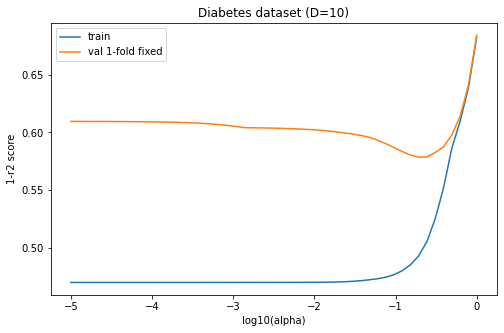

In [78]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),1-np.array(scores_train),label="train")
plt.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
plt.title("Diabetes dataset (D=10)")
plt.xlabel("log10(alpha)")
plt.ylabel("1-r2 score")
plt.legend()
plt.show()

# Larger custom dataset

In [ ]:
#Sparse coding settings

In [461]:
N_train = 720
N_train_folds = 20
N_val = 720
N_test = 36
N = N_train+N_val+N_test
D = 2000
D_small = 36
mu, sigma = 0, 1.0

X = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y = np.matmul(X_small,w_opt)


In [462]:
X[:,:D_small] = X_small
X_train = X[:N_train]
X_val = X[N_train:N_train+N_val]
X_test = X[N_train+N_val:]

y_train = y[:N_train]
y_val = y[N_train:N_train+N_val]
y_test = y[N_train+N_val:]

In [463]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-7, 1, 20)

scores_train_arr = np.zeros((N_train_folds,20))
scores_val_arr = np.zeros((N_train_folds,20))

for j in range(N_train_folds):
    print(j)
    X_train = X[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    


0
0
[ 1.62256999  0.49642338 -0.03482044 ...  0.         -0.
 -0.        ]
0.2816332641065248
46.20848254835186
1044.0
[-8.34583918e-01 -4.67001953e+00  1.38182554e+01 -1.70932524e-01
 -2.54180343e+00 -2.87771019e+00 -1.22038716e+00 -2.99414374e+00
  1.30277928e+00 -6.34016479e+00 -1.41174478e+00 -8.56666242e-01
 -8.77836952e+00  3.74454075e+00 -6.95329858e+00 -1.06161821e+01
  3.64763626e+00 -3.21178967e+00  1.02232474e+01  2.80990464e+00
  4.60283349e+00 -2.86299323e+00 -3.58585898e+00  4.02504349e+00
  8.67606900e+00 -8.15886510e-01  1.04655697e+00  2.05514525e+00
  6.35303914e+00  3.75513374e+00 -2.06183935e+00  2.73731445e+00
 -1.21111180e+00 -5.25011684e+00 -5.78502453e+00  1.26515512e+00
  5.78106697e+00  2.04663301e+00  7.96583101e+00 -1.84796432e+00
  1.72785499e+00  9.35370569e-01 -9.39774398e+00 -2.95360763e+00
  5.62053921e+00 -1.25458664e+01 -7.92608713e+00 -2.92964491e-01
 -6.78774843e-01  2.93234344e+00  1.71281554e+00 -3.71332324e+00
 -1.29700844e+01 -2.30758930e-02  1.

[-3.80123440e-01 -4.19598670e+00  1.53181988e+01  1.49752629e+00
 -5.31098375e+00 -2.63646166e+00  9.61551164e-01 -1.74921852e+00
  9.96036029e-01 -4.49685499e+00 -2.59364559e+00  3.02617370e-02
 -9.21489207e+00  3.55215092e+00 -4.47001590e+00 -1.07781643e+01
  3.92412761e+00 -2.81277618e+00  9.14341246e+00  3.37852039e+00
  2.24240425e+00 -5.16755547e+00 -3.47900915e+00  3.06060971e+00
  3.85569296e+00 -4.66071124e-01  3.66073329e-01  1.90060132e+00
  6.25961269e+00  3.30855709e+00 -8.37999028e-01  2.01258812e+00
 -5.80008320e-01 -3.48283711e+00 -4.51055733e+00 -1.41907701e+00
  2.54602647e+00  3.19433800e+00  3.36210174e+00 -1.52689641e+00
  3.98686235e-01 -1.81784058e+00 -7.93572738e+00 -1.48864847e+00
  6.27894761e+00 -1.16677441e+01 -5.82305322e+00  1.51539537e+00
 -1.61987154e-01  1.18042018e+00  2.52742784e+00 -2.36324438e+00
 -1.01591240e+01  3.23883082e-01  1.81058609e+00  8.06035546e+00
 -2.08018357e+00 -5.30314951e+00  4.83698697e+00  5.62650078e+00
  1.30938705e+00  4.35353

8
[ 0. -0. -0. ...  0.  0. -0.]
0.43536978233409696
16.085665086387426
106.0
[ 2.60898484e+00 -7.12987565e-01  1.38052910e+01  5.77088342e+00
 -2.11840883e+00 -4.36752950e+00  3.00719598e+00 -2.56837288e+00
  2.58296192e+00 -5.52124239e-01 -3.02112781e-01  2.08045514e+00
 -7.88211521e+00  4.56774506e+00  2.78234692e+00 -6.28979037e+00
  2.34734359e-01 -5.81944222e+00  6.83056944e+00  3.58710341e+00
 -8.04363016e-01 -2.98101404e+00  1.10759768e+00 -2.15283629e+00
  1.60449753e+00 -2.58531621e+00 -2.41562178e+00  1.58475598e+00
  1.40250563e+00 -2.37861198e+00 -2.04114814e-01 -1.47204564e+00
 -2.21393550e+00  3.28386846e+00  2.52126046e+00 -3.37641820e+00
 -2.56858013e+00 -4.34715870e-01  1.45659078e+00 -3.32191804e+00
 -1.72223077e+00 -2.37530888e+00 -6.41452692e-01  2.35106740e+00
  8.18000369e+00 -7.21746253e+00  1.52644354e+00  4.22562482e+00
  1.88423930e-02 -2.28934386e+00  7.29789636e-01 -8.06744778e-01
 -1.36164535e+00  5.49238873e-01 -3.28309213e-01  8.46002546e+00
  9.45937170e

9
[ 0. -0.  0. ... -0.  0.  0.]
0.02980312224597259
13.356401031659338
58.0
[ 2.41825284e-01  3.30919719e+00  5.44792236e+00  4.10158268e+00
 -4.33555378e-01  4.60928931e-01  4.46253370e-01  3.42131782e+00
  2.11014989e+00  2.10804102e+00 -2.45018849e+00 -1.73894437e+00
 -1.93617663e+00  4.29697817e+00 -6.26286785e-01 -3.10238539e+00
 -2.69558521e+00 -6.79135800e+00  3.90033332e+00  1.20958753e+00
  4.47523542e-01 -1.99481695e+00  4.71221405e+00  2.20884943e+00
  3.50335011e+00 -3.26384364e+00 -3.35270850e-01 -3.59698626e-01
  2.83381942e+00  2.98147270e+00  1.16285015e+00 -3.04598653e-01
 -3.91332649e-01 -1.74533336e+00  4.31343925e-01  2.61015064e+00
  1.07249590e+00  6.84615557e-01 -1.83244954e+00 -3.00739186e+00
  4.43112080e+00  7.50405991e-01  9.97934298e-01  1.06150110e+00
  6.43952512e+00 -2.13315339e-01  2.76744967e+00  4.81666324e+00
  3.06609376e+00  1.09160411e+00 -2.31317507e+00  1.92265084e+00
  2.50375426e-01  2.89956426e-01 -3.81218858e-01  2.05079524e+00
 -3.75228710e-

10
[ 0.  0.  0. ... -0.  0.  0.]
-0.08976564322073965
12.960088558576661
48.0
[ 0.13416055  3.36036077  3.88314771  1.77105787  0.76430295  2.5975875
  1.1778217   2.44502073  1.30890158  4.56924993 -3.36335264 -1.84352528
 -3.35782247  4.63586485  0.17721574 -0.68164456 -1.19883614 -6.11988008
  1.51101455  0.92043032  3.40774593 -1.26395194  3.40782027  0.67391747
  2.83913273 -2.92202684 -0.81593517  0.81740003  2.55539766  2.39511281
  1.27596043 -1.11269701  0.05079313 -2.41398672 -0.75964928  1.21038912
  4.8277494   2.05991245 -1.97544964 -1.95903778  4.33209202  1.16841792
  2.29557819  0.44520495  2.66215818 -2.18112868  2.67267395  2.18165817
  2.69097646  1.27898031 -1.54413849 -0.25845883 -3.11405643  0.84399892
 -0.20516103 -0.04750488 -3.37938204 -6.68838436 -4.02620551 -0.61994041
  1.3913118   2.49277699  0.48714687 -1.19947423 -2.99792528  1.54449823
 -3.00831917  2.30384847  0.48957727  2.31692614 -0.62038908  0.17242742
  1.0196832   1.57106333  1.35173896  0.2453802

11
[ 0.  0. -0. ... -0.  0. -0.]
-0.10856528572150359
12.881564926708192
41.0
[ 2.06806848e+00  3.98600184e+00  2.98419744e+00  1.62590119e+00
 -3.28078829e-02  2.24659731e+00  1.33549502e+00  4.15729603e-01
  1.01775047e+00  5.71281604e+00 -3.74309912e+00 -1.90776078e+00
 -3.63016879e+00  4.82133399e+00  2.31214717e+00  7.52777925e-01
 -6.12806783e-01 -5.93545454e+00 -4.36617833e-02  5.80522021e-01
  2.48585202e+00 -1.41837900e+00  2.41340126e+00  4.75763842e-01
  3.59109931e+00  8.02262237e-03 -2.99137080e-01  2.95142453e-01
  2.53662164e-01  2.14438802e+00 -2.18627637e-01 -1.79954877e+00
  1.57755437e+00 -6.55535758e-01 -1.02444372e+00  2.51007791e-01
  4.72885718e+00  4.17509118e+00 -2.30724644e+00 -1.98876674e+00
  3.94010900e+00  1.04814921e+00  2.56535543e+00  4.21961285e-01
  5.89272726e-01 -2.67912946e+00  4.37368408e+00  5.23168524e-01
  7.08788806e-01  1.28544522e+00 -1.86433600e+00 -2.31710401e+00
 -3.47200836e+00 -1.91622328e+00  1.56534850e+00  2.92477265e-01
 -4.65889178

13
[ 0.  0. -0. ... -0.  0. -0.]
-0.10512262672066552
12.715291515498004
37.0
[ 1.85790296e+00  4.46924897e+00  2.78784888e+00  1.56890940e+00
 -4.02795212e-01  2.38005771e+00  1.28379700e+00 -9.97243012e-03
  1.22454339e+00  5.66922536e+00 -3.79630021e+00 -2.18012362e+00
 -3.91084152e+00  4.54811549e+00  2.15069489e+00  9.03922212e-01
 -8.29589523e-01 -5.96450529e+00 -4.58635652e-01  6.71831222e-01
  2.55357135e+00 -1.29288075e+00  2.29169651e+00  5.38581018e-01
  3.69352404e+00 -1.30734999e-01 -5.58496879e-01  2.69605777e-01
  2.62383733e-01  2.33199855e+00 -1.78397337e-01 -1.71191858e+00
  1.34310681e+00 -8.27039768e-01 -1.25408294e+00  3.03741264e-01
  4.03467068e+00  4.12215802e+00 -2.19254033e+00 -2.46253463e+00
  3.69502145e+00  7.33908495e-01  2.05943114e+00  2.42735356e-01
  7.51985872e-01 -2.39730479e+00  4.51833366e+00  8.64217507e-01
  2.38168872e-01  1.36411471e+00 -1.88130837e+00 -2.55390799e+00
 -3.67570174e+00 -2.05448402e+00  1.49158683e+00  3.58618360e-01
 -4.54696464



2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19




In [464]:
scores_val_arr

array([[ 2.81633264e-01,  2.81633875e-01,  2.81635206e-01,
         2.81638562e-01,  2.81647470e-01,  2.81668884e-01,
         2.81722334e-01,  3.77228985e-01,  4.35369782e-01,
         2.98031222e-02, -8.97656432e-02, -1.08565286e-01,
        -1.09178579e-01, -1.05122627e-01, -1.06456554e-01,
        -1.04386559e-01, -1.07330997e-01, -9.78260349e-02,
        -8.96962786e-02, -8.96962786e-02],
       [ 3.21893332e-01,  3.21893943e-01,  3.21895647e-01,
         3.21900281e-01,  3.21911261e-01,  3.21940377e-01,
         3.22021073e-01,  4.21524504e-01,  4.36307785e-01,
         1.21934740e-01, -1.61933580e-02, -5.82439849e-02,
        -7.46967441e-02, -9.23795450e-02, -8.82097964e-02,
        -7.19760525e-02, -3.66870377e-02, -2.14638602e-02,
        -6.18925645e-03, -6.18925645e-03],
       [ 1.80445075e-01,  1.80445665e-01,  1.80447279e-01,
         1.80451916e-01,  1.80463529e-01,  1.80493621e-01,
         1.80565814e-01,  3.15348827e-01,  5.08740434e-01,
         2.02121766e-01,  4.0

In [465]:
np.mean(scores_train_arr,axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999999, 0.99999995,
       0.99999966, 0.99999751, 0.99998259, 0.99987936, 0.9991649 ,
       0.99426715, 0.96175359, 0.76426228, 0.07443053, 0.        ])

In [466]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

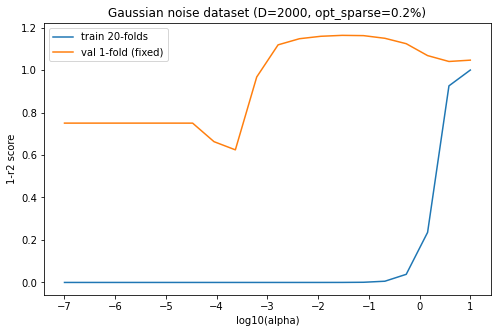

In [467]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),1-np.array(scores_train),label="train 20-folds")
plt.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=2000, opt_sparse=0.2%)")
plt.xlabel("log10(alpha)")
plt.ylabel("1-r2 score")
plt.legend()
plt.show()

In [ ]:
#Conventional regression settings

In [445]:
N_train = 2000
N_train_folds = 1
N_val = 2000
N_test = 36
N = N_train+N_val+N_test
D = 36
D_small = 2
mu, sigma = 0, 1.0

X = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y = np.matmul(X_small,w_opt)



In [446]:
X[:,:D_small] = X_small
X_train = X[:N_train]
X_val = X[N_train:N_train+N_val]
X_test = X[N_train+N_val:]

y_train = y[:N_train]
y_val = y[N_train:N_train+N_val]
y_test = y[N_train+N_val:]


In [450]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-15, 1, 50)

scores_train_arr = np.zeros((N_train_folds,50))
scores_val_arr = np.zeros((N_train_folds,50))

for j in range(N_train_folds):
    print(j)
    X_train = X[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    



0
0
[-1.24343153e+00  6.87998579e-01 -2.01344586e-07 -9.27485220e-07
 -2.96474068e-07 -3.52476110e-07 -4.23567559e-07 -1.53961919e-07
  6.30564097e-07 -2.53395872e-07 -2.62905959e-07 -7.28668016e-08
 -1.92946698e-07  1.10302871e-07  2.45614300e-07 -9.67280871e-08
 -5.74944635e-08 -1.09346749e-07  2.42070345e-07  2.46387443e-09
  1.60351367e-07  9.51756743e-08  1.12984265e-07  4.03773167e-08
 -1.04493540e-07 -7.11029482e-08  1.24350929e-07  1.10770635e-08
 -7.46754245e-08 -1.60165470e-08  2.31900566e-08 -7.38602289e-08
  1.36098903e-08 -6.33823787e-08 -6.34594554e-08 -1.86499407e-08]
0.9999999999988208
1.9314358109215042
36.0
[ 1.75861186  0.9909783  -1.19761922 ... -0.998657   -0.03340577
  0.25773389]


1
[-1.24343153e+00  6.87998579e-01 -2.01344584e-07 -9.27485218e-07
 -2.96474067e-07 -3.52476109e-07 -4.23567558e-07 -1.53961918e-07
  6.30564096e-07 -2.53395871e-07 -2.62905958e-07 -7.28668003e-08
 -1.92946697e-07  1.10302870e-07  2.45614299e-07 -9.67280860e-08
 -5.74944621e-08 -1.0934

In [451]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

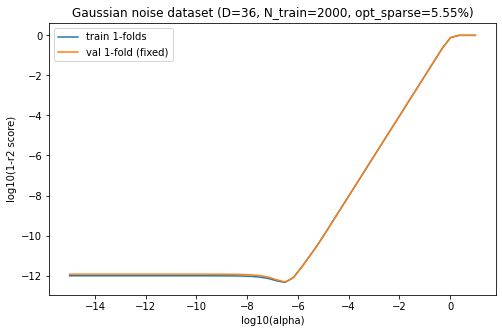

In [453]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_train)),label="train 1-folds")
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_val)),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=36, N_train=2000, opt_sparse=5.55%)")
plt.xlabel("log10(alpha)")
plt.ylabel("log10(1-r2 score)")
plt.legend()
plt.show()

In [541]:
from qubovert import boolean_var

N = 10

# create the variables
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

# minimize \sum_{i=0}^{N-2} (1-2x_{i}) x_{i+1}
model = 0
for i in range(N-1):
    model += (1 - 2 * x[i]) * x[i+1]

In [582]:
N=2000
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

In [583]:
A = np.ones((N,N))
b = np.zeros(N)

model = 0

for i in range(N):
    print(i)
    for j in range(N):
        model += x[i]*A[i][j]*x[j]
    model += b[i]*x[i]
    
#print(model)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [585]:
len(model)

2001000

In [586]:
model

{('x(0)',): 1.0,
 ('x(0)', 'x(1)'): 2.0,
 ('x(0)', 'x(2)'): 2.0,
 ('x(0)', 'x(3)'): 2.0,
 ('x(0)', 'x(4)'): 2.0,
 ('x(0)', 'x(5)'): 2.0,
 ('x(0)', 'x(6)'): 2.0,
 ('x(0)', 'x(7)'): 2.0,
 ('x(0)', 'x(8)'): 2.0,
 ('x(0)', 'x(9)'): 2.0,
 ('x(0)', 'x(10)'): 2.0,
 ('x(0)', 'x(11)'): 2.0,
 ('x(0)', 'x(12)'): 2.0,
 ('x(0)', 'x(13)'): 2.0,
 ('x(0)', 'x(14)'): 2.0,
 ('x(0)', 'x(15)'): 2.0,
 ('x(0)', 'x(16)'): 2.0,
 ('x(0)', 'x(17)'): 2.0,
 ('x(0)', 'x(18)'): 2.0,
 ('x(0)', 'x(19)'): 2.0,
 ('x(0)', 'x(20)'): 2.0,
 ('x(0)', 'x(21)'): 2.0,
 ('x(0)', 'x(22)'): 2.0,
 ('x(0)', 'x(23)'): 2.0,
 ('x(0)', 'x(24)'): 2.0,
 ('x(0)', 'x(25)'): 2.0,
 ('x(0)', 'x(26)'): 2.0,
 ('x(0)', 'x(27)'): 2.0,
 ('x(0)', 'x(28)'): 2.0,
 ('x(0)', 'x(29)'): 2.0,
 ('x(0)', 'x(30)'): 2.0,
 ('x(0)', 'x(31)'): 2.0,
 ('x(0)', 'x(32)'): 2.0,
 ('x(0)', 'x(33)'): 2.0,
 ('x(0)', 'x(34)'): 2.0,
 ('x(0)', 'x(35)'): 2.0,
 ('x(0)', 'x(36)'): 2.0,
 ('x(0)', 'x(37)'): 2.0,
 ('x(0)', 'x(38)'): 2.0,
 ('x(0)', 'x(39)'): 2.0,
 ('x(0)', 'x(40)'

In [527]:
model_solution = model.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", model.value(model_solution))
print("Constraints satisfied?", model.is_solution_valid(model_solution))

Variable assignment: {'x(0)': 0, 'x(1)': 0, 'x(2)': 0, 'x(3)': 0, 'x(4)': 0, 'x(5)': 0, 'x(6)': 0, 'x(7)': 0, 'x(8)': 0, 'x(9)': 0}
Model value: 0
Constraints satisfied? True


In [587]:
from qubovert.sim import anneal_qubo

res = anneal_qubo(model, num_anneals=10)
model_solution = res.best.state

print("Variable assignment:", model_solution)
print("Model value:", res.best.value)
print("Constraints satisfied?", model.is_solution_valid(model_solution))

KeyboardInterrupt: 

In [4]:


X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

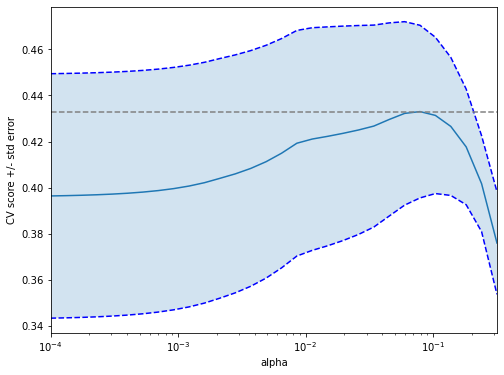

In [5]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [8]:
scores

array([0.39638051, 0.39650624, 0.39667201, 0.39689044, 0.39717807,
       0.39755659, 0.39805404, 0.39870708, 0.3995624 , 0.40067986,
       0.40213502, 0.40402065, 0.40596304, 0.40831427, 0.41123993,
       0.41489967, 0.41926122, 0.42107802, 0.42225458, 0.42355432,
       0.42500251, 0.42670708, 0.42957468, 0.43220641, 0.43298992,
       0.43133725, 0.42655766, 0.41766182, 0.4017079 , 0.3759415 ])

In [9]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])